Partie A : From Scratch (Descente de Gradient)

Bloc A.1 : Imports, Données et Visualisation

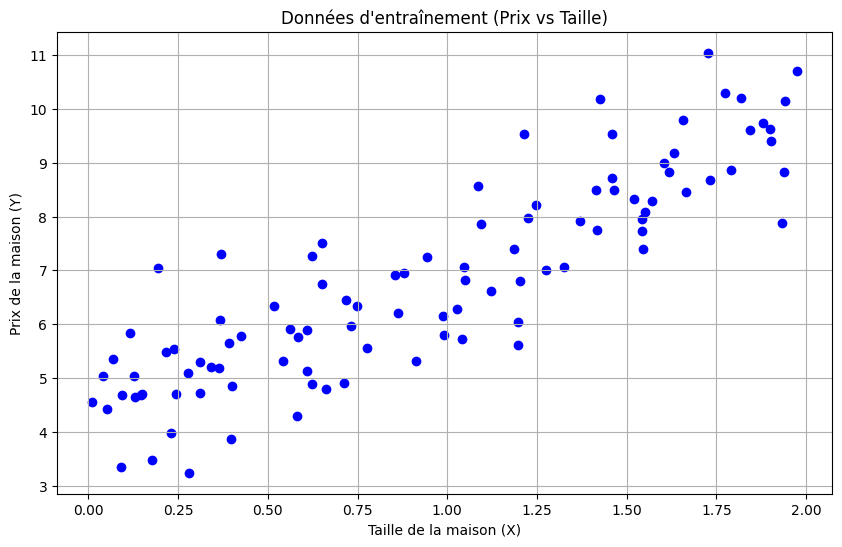

In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', marker='o')
plt.title("Données d'entraînement (Prix vs Taille)")
plt.xlabel("Taille de la maison (X)")
plt.ylabel("Prix de la maison (Y)")
plt.grid(True)
plt.show()


Bloc A.2 : Fonction Objectif (Coût)

In [9]:
def compute_cost(X, y, theta):

    m = len(y) # Nombre d'échantillons
    predictions = X.dot(theta)
    # Erreur quadratique moyenne (MSE)
    sq_errors = (predictions - y)**2
    # La fonction de coût est la somme des erreurs au carré, divisée par 2m
    J = (1 / (2 * m)) * np.sum(sq_errors)
    return J

# Initialisation des paramètres theta (theta_0 et theta_1)
theta = np.zeros((2, 1))

# Test initial
print(f"Coût initial avec theta=[0, 0]: {compute_cost(X_b, y, theta):.4f}")

Coût initial avec theta=[0, 0]: 25.0042


Bloc A.3 : Descente de Gradient

In [10]:
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    historique_cout = []

    for iteration in range(num_iterations):
        # 1. Calcul des prédictions et de l'erreur
        predictions = X.dot(theta) # h(x)
        errors = predictions - y # h(x) - y

        # 2. Calcul du gradient (dérivée partielle)
        # Formule matricielle du gradient: (1/m) * X_transpose * erreurs
        gradient = X.T.dot(errors) / m

        # 3. Mise à jour des paramètres theta
        # theta = theta - alpha * gradient
        theta = theta - alpha * gradient

        # Enregistrement du coût pour le suivi
        historique_cout.append(compute_cost(X, y, theta))

    return theta, historique_cout

alpha = 0.01
num_iterations = 1000

# Initialisation
theta = np.zeros((2, 1))

# Entraînement du modèle
theta_final, historique_cout = gradient_descent(X_b, y, theta, alpha, num_iterations)

print(f"Paramètres (Theta) finaux: \nTheta 0 (Interception): {theta_final[0, 0]:.4f}\nTheta 1 (Pente): {theta_final[1, 0]:.4f}")
print(f"Coût final: {historique_cout[-1]:.4f}")

Paramètres (Theta) finaux: 
Theta 0 (Interception): 4.0332
Theta 1 (Pente): 2.9307
Coût final: 0.4083


Bloc A.4 : Visualisation des Résultats From Scratch

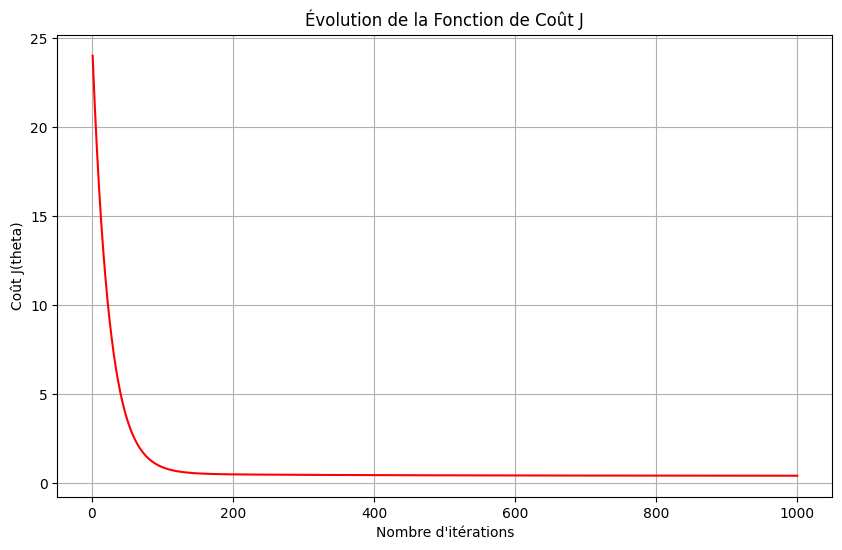

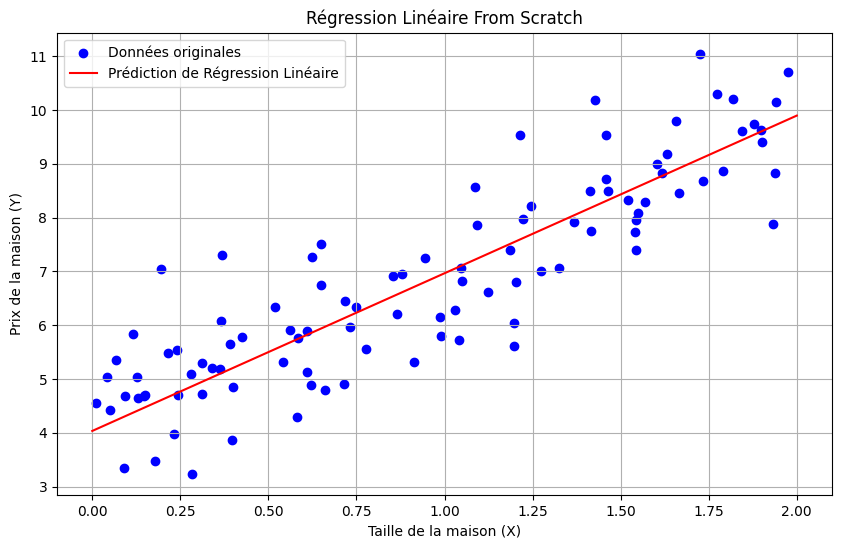

Prix prédit pour une taille de 1.5: 8.4293


In [11]:

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), historique_cout, color='red')
plt.title("Évolution de la Fonction de Coût J")
plt.xlabel("Nombre d'itérations")
plt.ylabel("Coût J(theta)")
plt.grid(True)
plt.show()
def predict(X_data, theta):
    # Ajoute la colonne de 1 si elle n'y est pas (pour la prédiction sur de nouvelles données)
    if X_data.shape[1] == 1:
        X_data_b = np.c_[np.ones((len(X_data), 1)), X_data]
    else:
        X_data_b = X_data

    return X_data_b.dot(theta)

# Création des points pour tracer la droite
X_new = np.array([[0], [2]])
y_predict = predict(X_new, theta_final)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', marker='o', label="Données originales")
plt.plot(X_new, y_predict, "r-", label="Prédiction de Régression Linéaire")
plt.title("Régression Linéaire From Scratch")
plt.xlabel("Taille de la maison (X)")
plt.ylabel("Prix de la maison (Y)")
plt.legend()
plt.grid(True)
plt.show()

maison_nouvelle = np.array([[1.5]])
prix_predit = predict(maison_nouvelle, theta_final)
print(f"Prix prédit pour une taille de 1.5: {prix_predit[0, 0]:.4f}")

Partie B : Scikit-learn (sklearn)


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_sklearn = LinearRegression()

# 2. Entraîner le modèle (méthode fit)
# X doit être une matrice de forme (n_samples, n_features)
model_sklearn.fit(X, y)

# 3. Faire des prédictions
y_pred_sklearn = model_sklearn.predict(X)

# 4. Afficher les paramètres trouvés
# Interception (theta_0)
theta_0_sklearn = model_sklearn.intercept_[0]
# Coefficient (theta_1)
theta_1_sklearn = model_sklearn.coef_[0, 0]

print(f"Résultats Sklearn:")
print(f"Theta 0 (Interception): {theta_0_sklearn:.4f}")
print(f"Theta 1 (Pente): {theta_1_sklearn:.4f}")

# 5. Évaluation du modèle
mse_sklearn = mean_squared_error(y, y_pred_sklearn)
print(f"Erreur Quadratique Moyenne (MSE) Sklearn: {mse_sklearn:.4f}")


print(f"Coût J (similaire à 'from scratch'): {mse_sklearn / 2:.4f}")

Résultats Sklearn:
Theta 0 (Interception): 4.2151
Theta 1 (Pente): 2.7701
Erreur Quadratique Moyenne (MSE) Sklearn: 0.8066
Coût J (similaire à 'from scratch'): 0.4033


Partie C : Modèle de Régression Linéaire avec TensorFlow/Keras

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)


--- Résultats TensorFlow/Keras ---
Loss (MSE) sur l'ensemble de test: 0.6647
Poids (Theta 1 - sur données échelonnées): 1.6274
Biais (Theta 0 - sur données échelonnées): 6.7392


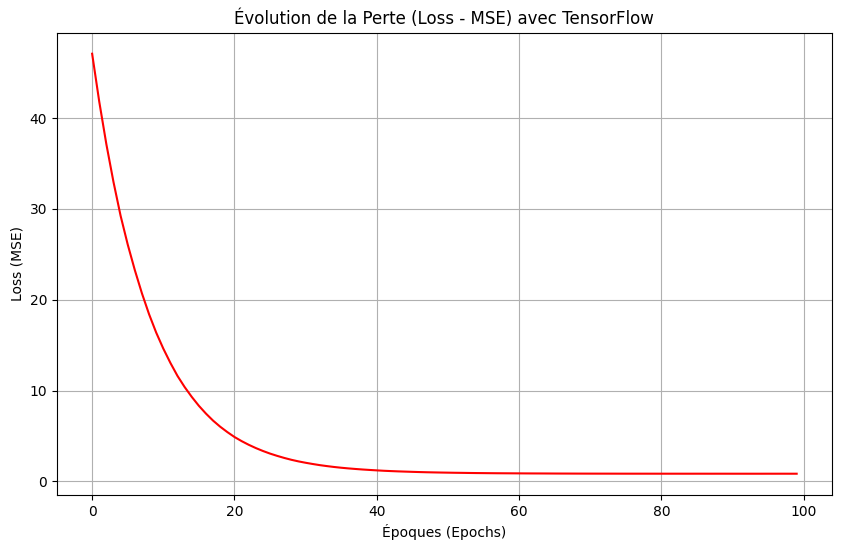

Prix prédit pour une taille de 1.5 (après scaling/descaling implicite): 8.3145


In [13]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des données (pour optimiser l'entraînement TF)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)


model_tf = keras.Sequential([

    keras.layers.Dense(units=1, input_shape=(1,))
])


model_tf.compile(optimizer='sgd',  # Stochastic Gradient Descent (Descente de Gradient)
                 loss='mse',      # Mean Squared Error (Erreur Quadratique Moyenne)
                 metrics=['mae']) # Metric : Mean Absolute Error (pour le suivi)


model_tf.summary()



history = model_tf.fit(X_train_scaled, y_train,
                       epochs=100, # Nombre d'itérations
                       verbose=0) # Ne pas afficher le log à chaque epoch

loss, mae = model_tf.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\n--- Résultats TensorFlow/Keras ---")
print(f"Loss (MSE) sur l'ensemble de test: {loss:.4f}")

# Extraire les poids (coefficients/Thetas)
# Les poids sont renvoyés sous forme [poids, biais] -> [theta_1, theta_0]
weights, bias = model_tf.layers[0].get_weights()

# ATTENTION : Ces paramètres sont optimisés pour les données ÉCHELONNÉES (scaled data).
# Pour les comparer aux résultats 'from scratch' (sur données non-standardisées),
# il faudrait les re-transformer ou comparer les prédictions finales.
print(f"Poids (Theta 1 - sur données échelonnées): {weights[0, 0]:.4f}")
print(f"Biais (Theta 0 - sur données échelonnées): {bias[0]:.4f}")

# -----------------
# 6. VISUALISATION DE LA PERTE
# -----------------
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], color='red')
plt.title("Évolution de la Perte (Loss - MSE) avec TensorFlow")
plt.xlabel("Époques (Epochs)")
plt.ylabel("Loss (MSE)")
plt.grid(True)
plt.show()

# -----------------
# 7. PRÉDICTION SUR DE NOUVELLES DONNÉES
# -----------------
# Pour prédire, la nouvelle donnée DOIT être mise à l'échelle avec le MÊME Scaler
new_house_size = np.array([[1.5]])
new_house_scaled = scaler_X.transform(new_house_size)

# Prédiction
prix_predit_tf = model_tf.predict(new_house_scaled, verbose=0)

print(f"Prix prédit pour une taille de {new_house_size[0, 0]} (après scaling/descaling implicite): {prix_predit_tf[0, 0]:.4f}")

Bloc C.2 : Visualisation des Prédictions et Comparaison Finale

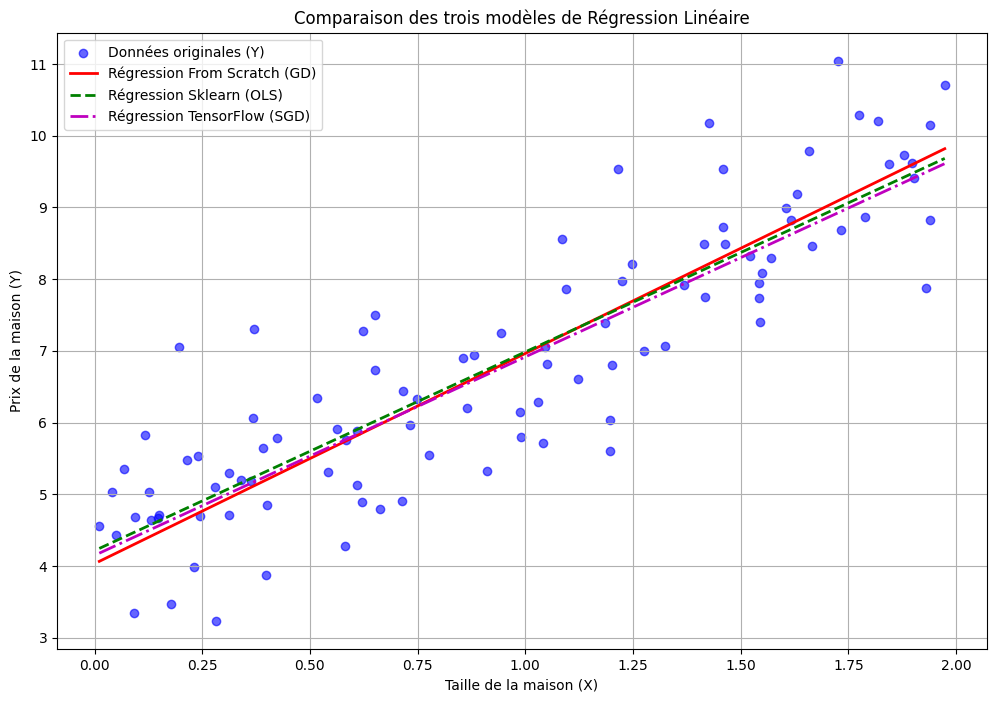


--- RÉCAPITULATIF FINAL DES PARAMÈTRES ET COÛTS ---
Méthode         | Interception (Theta 0)    | Pente (Theta 1) | Coût/Loss 
----------------------------------------------------------------------
From Scratch    | 4.0332                    | 2.9307          | 0.4083     (J)
Sklearn         | 4.2151                    | 2.7701          | 2.8259     (J approx)
TensorFlow      | 6.7392                    | 1.6115          | 0.3312     (Loss / 2)


In [7]:
# Importations nécessaires
import matplotlib.pyplot as plt



X_visu = np.linspace(X.min(), X.max(), 100).reshape(-1, 1) # 100 points pour la droite

# a) Prédiction From Scratch
# Utilise la fonction 'predict' et les theta_final de la Partie A
X_visu_b = np.c_[np.ones((len(X_visu), 1)), X_visu]
y_pred_scratch = X_visu_b.dot(theta_final)

# b) Prédiction Sklearn
# Utilise le modèle model_sklearn de la Partie B
y_pred_sklearn = model_sklearn.predict(X_visu)

# c) Prédiction TensorFlow/Keras
# DOIT utiliser les données scalées
X_visu_scaled = scaler_X.transform(X_visu)
y_pred_tf = model_tf.predict(X_visu_scaled, verbose=0)

# -----------------
# 2. VISUALISATION DES TROIS DROITES
# -----------------
plt.figure(figsize=(12, 8))

# Données originales
plt.scatter(X, y, color='blue', marker='o', alpha=0.6, label="Données originales (Y)")

# Droites de Régression
plt.plot(X_visu, y_pred_scratch, "r-", linewidth=2, label="Régression From Scratch (GD)")
plt.plot(X_visu, y_pred_sklearn, "g--", linewidth=2, label="Régression Sklearn (OLS)")
plt.plot(X_visu, y_pred_tf, "m-.", linewidth=2, label="Régression TensorFlow (SGD)")

plt.title("Comparaison des trois modèles de Régression Linéaire")
plt.xlabel("Taille de la maison (X)")
plt.ylabel("Prix de la maison (Y)")
plt.legend()
plt.grid(True)
plt.show()

# -----------------
# 3. RÉCAPITULATIF DES RÉSULTATS
# -----------------
# Rappel des résultats pour la comparaison (réutilise les variables des parties A, B, C.1)

print("\n--- RÉCAPITULATIF FINAL DES PARAMÈTRES ET COÛTS ---")
print(f"{'Méthode':<15} | {'Interception (Theta 0)':<25} | {'Pente (Theta 1)':<15} | {'Coût/Loss':<10}")
print("-" * 70)

# From Scratch (données non-scalées)
print(f"{'From Scratch':<15} | {theta_final[0, 0]:<25.4f} | {theta_final[1, 0]:<15.4f} | {historique_cout[-1]:<10.4f} (J)")

# Sklearn (données non-scalées)
print(f"{'Sklearn':<15} | {theta_0_sklearn:<25.4f} | {theta_1_sklearn:<15.4f} | {mean_squared_error(y, y_pred_sklearn) / 2:<10.4f} (J approx)")

# TensorFlow (données scalées) - Notez que les Thêtas sont basés sur les données scalées
print(f"{'TensorFlow':<15} | {bias[0]:<25.4f} | {weights[0, 0]:<15.4f} | {loss / 2:<10.4f} (Loss / 2)")

# Note : Les modèles 'From Scratch' et 'Sklearn' donnent des paramètres (Theta 0, Theta 1)
# directement interprétables sur les données originales. Le modèle TensorFlow donne des
# paramètres optimisés pour les données standardisées.